# Explorig CIA World Factbook
## Practicing using database connection

In [57]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [58]:
query = "SELECT * FROM facts;"
pd.read_sql_query(query, conn).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


### Summary statistics

In [59]:
query = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(query, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [60]:
query_min_pop = "SELECT * FROM facts WHERE population = (SELECT MIN(population) FROM facts);"
pd.read_sql_query(query_min_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [61]:
query_max_pop = "SELECT * FROM facts WHERE population = (SELECT MAX(population) FROM facts);"
pd.read_sql_query(query_max_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


As we can see from the query results above, the two outlier values of minimum and maximum population belongs to the continent Antartica and the World in total. This means that they are not incorrect.

### Visualizing some facts

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66debbe278>,
      dtype=object)

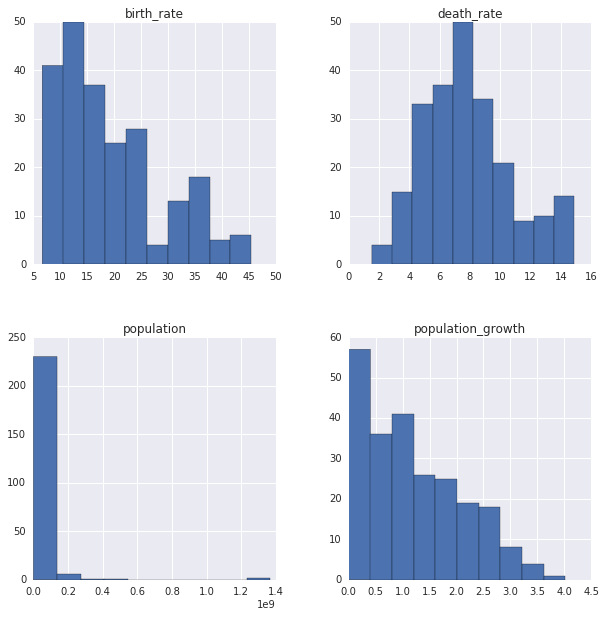

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
query_hist = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MIN(population) FROM facts) AND population != (SELECT MAX(population) FROM facts)"
pd.read_sql_query(query_hist, conn).hist(ax=ax)

### Population density

In [64]:
query_pop_dens = "SELECT name, CAST(population as Float)/CAST(area_land as Float) as pop_dens FROM facts ORDER BY pop_dens DESC"

pd.read_sql_query(query_pop_dens, conn).head()

,name,pop_dens
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66de221160>]],
      dtype=object)

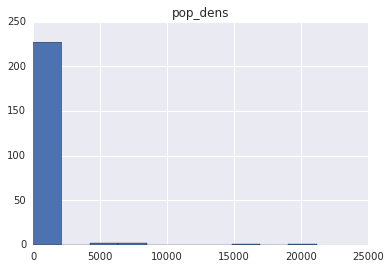

In [65]:
pd.read_sql_query(query_pop_dens, conn).hist()

In [66]:
query_water_land = "SELECT name, CAST(area_water as Float)/CAST(area_land as Float) as water_land_ratio FROM facts ORDER BY water_land_ratio DESC"

pd.read_sql_query(query_water_land, conn).head()

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
